## A. Multinomial KNN:

#### VD A.1:

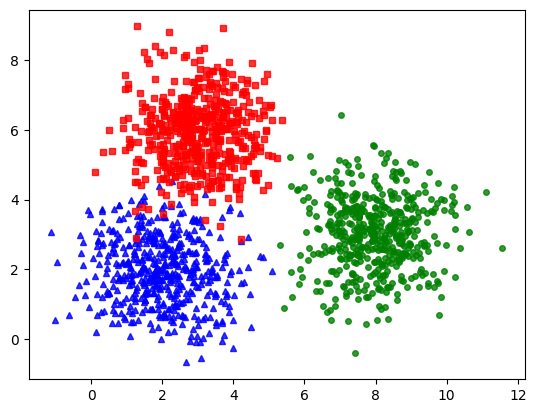

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# randomly generate data
N = 500 # number of training sample
d = 2 # data dimension
C = 3 # number of classes (for c = 0, 1, 2)
means = [[2, 2], [8, 3], [3, 6]] # centeroid of each class dataset
cov = [[1, 0], [0, 1]]
# generate 3 classes of datasets
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)
# each column is a datapoint (arrange 3 vectors X1 X2 X3 then transpose matrix)
X = np.concatenate((X0, X1, X2), axis = 0).T
# Generate label for data points of each class (0, 1, 2)
# with first 500 will belong to class 0, second 500 => 1 and last 500=> class 2
original_label = np.asarray([0]*N + [1]*N + [2]*N).T

def display(X, label):
    X0 = X[:, label == 0]
    X1 = X[:, label == 1]
    X2 = X[:, label == 2]
    plt.plot(X0[0, :], X0[1,:], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[0, :], X1[1,:], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[0, :], X2[1,:], 'rs', markersize = 4, alpha = .8)
    plt.plot()
    plt.show()

display(X[0:, :], original_label)

In [33]:
X_train = np.concatenate((X0[:400], X1[:400], X2[:400]), axis = 0)
Y_train = np.concatenate((original_label[:400], original_label[500:900],
original_label[1000:1400]), axis = 0)
X_val = np.concatenate((X0[400:], X1[400:], X2[400:]), axis = 0)
Y_val = np.concatenate((original_label[400:500], original_label[900:1000],
original_label[1400:1500]), axis = 0)
print(X_train.shape, Y_train.shape, X_val.shape, Y_val.shape)

(1200, 2) (1200,) (300, 2) (300,)


In [52]:
import numpy as np

def distance(array, value):
    return np.linalg.norm(array - value, ord = 2, axis=1)

def find_nearest_index(X_train, value, K):
    dist = distance(X_train, value)
    return np.argsort(dist)[: K]

def highest_rank(arr):
    count_num = {}
    for i in arr:
        count_num[i] = arr.count(i)
    return max(count_num, key=count_num.get)

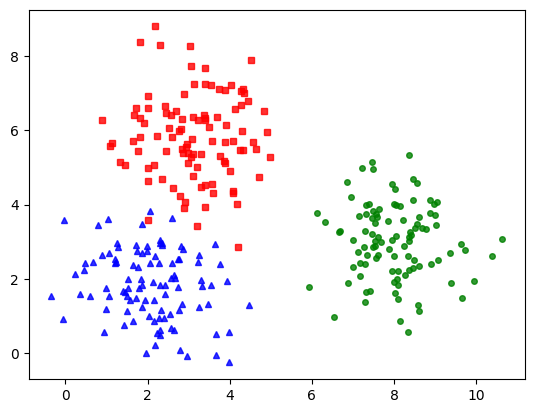

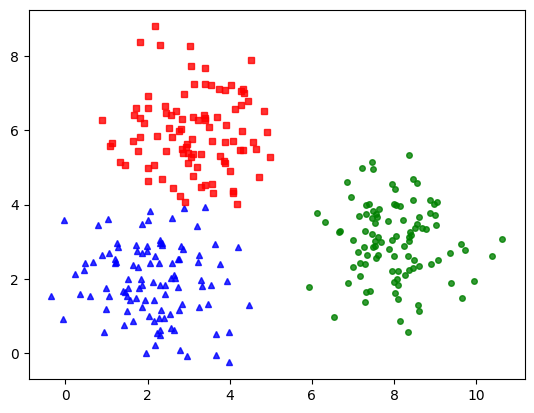

In [59]:
K = 20
y_pred = np.zeros(len(Y_val)).astype(int)
for j in range(len(Y_val)):
    indexes = find_nearest_index(X_train, X_val[j], K)
    y_nearest = []
    for i in range(K):
        y_nearest.append(Y_train[indexes[i]])
    y_pred[j] = highest_rank(y_nearest)
display(X_val.T, Y_val)
display(X_val.T, y_pred)

<Figure size 1000x600 with 0 Axes>

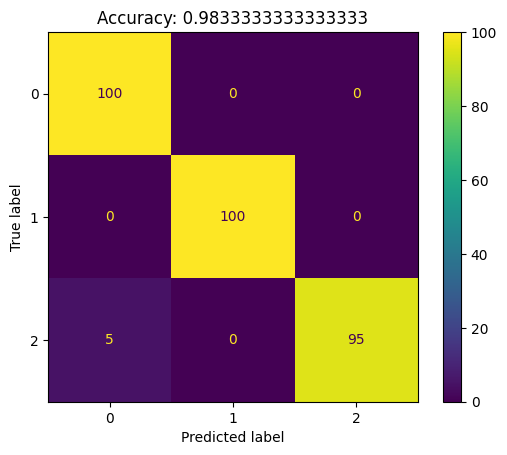

In [61]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
ConfusionMatrixDisplay.from_predictions(Y_val, y_pred)
plt.title(f'Accuracy: {accuracy_score(Y_val, y_pred)}')
plt.show()

#### VD A.2:

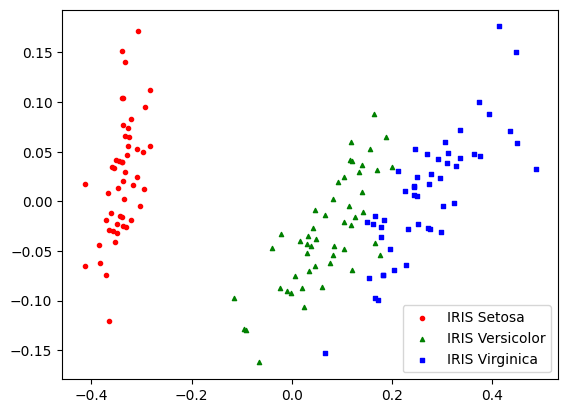

In [65]:
import pandas as pd
from sklearn.decomposition import PCA as sklearnPCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
# import some data to play with
iris = datasets.load_iris()

X = iris.data[:, :4] # we take full 4 features
Y = iris.target
# Normalize data
X_norm = (X - X.min())/(X.max() - X.min())
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(X_norm))
plt.scatter(transformed[Y==0][0], transformed[Y==0][1], s=9, label='IRIS Setosa', c='red')
plt.scatter(transformed[Y==1][0], transformed[Y==1][1], s=9, label='IRIS Versicolor',c='green', marker="^")
plt.scatter(transformed[Y==2][0], transformed[Y==2][1], s=9, label='IRIS Virginica', c='blue', marker="s")
plt.legend()
plt.show()

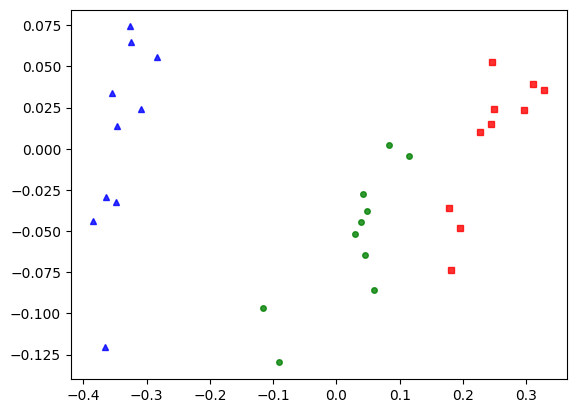

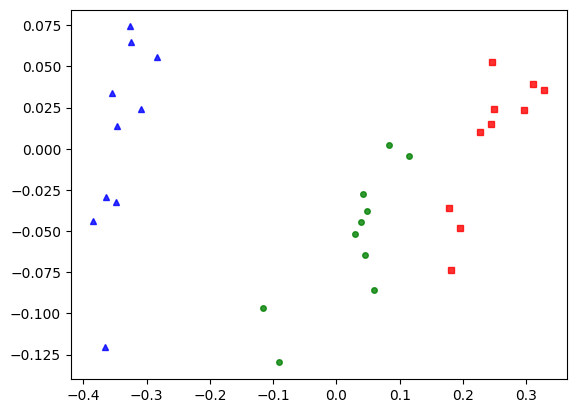

In [72]:
from sklearn.model_selection import train_test_split

X_train = np.concatenate((transformed[Y == 0][:40], transformed[Y == 1][:40], transformed[Y == 2][:40]), axis=0)
X_val = np.concatenate((transformed[Y == 0][40:], transformed[Y == 1][40:], transformed[Y == 2][40:]), axis=0)
Y_train = np.concatenate((Y[Y == 0][:40], Y[Y == 1][:40], Y[Y == 2][:40]), axis=0)
y_val = np.concatenate((Y[Y == 0][40:], Y[Y == 1][40:], Y[Y == 2][40:]), axis=0)

K = 12
y_pred = np.zeros(len(y_val)).astype(int)
for j in range(len(y_val)):
    indexes = find_nearest_index(X_train, X_val[j], K)
    y_nearest = []
    for i in range(K):
        y_nearest.append(Y_train[indexes[i]])
    y_pred[j] = highest_rank(y_nearest)
display(X_val.T, y_val)
display(X_val.T, y_pred)

<Figure size 1000x600 with 0 Axes>

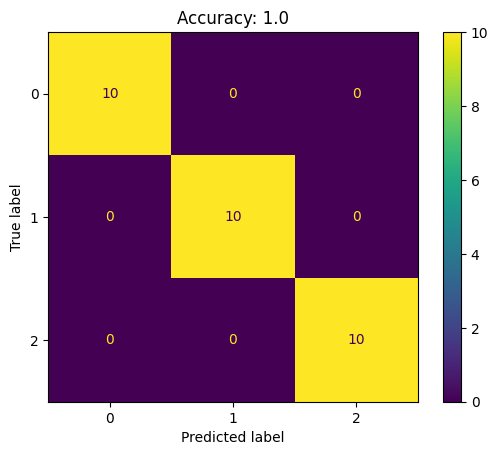

In [73]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
ConfusionMatrixDisplay.from_predictions(y_val, y_pred)
plt.title(f'Accuracy: {accuracy_score(y_val, y_pred)}')
plt.show()